# Услвоие задачи
## Дано:
$$
r( \varphi ) = R \left( \sin ^2 \left( \frac{\varphi}{2} \right) - 4 \cos \varphi \right)
$$
$$
\varphi(t) = kt^2 - \omega t
$$
$$
R = 1 \ \text{м}, \quad k = 1 \ \frac{\text{рад}}{\text{c}^2}, \quad \omega = 1 \ \frac{\text{рад}}{\text{c}}, \quad t_0 = 1 \ \text{с}
$$

## Найти:
1. Скорости
$$
v(t), \ \dot{\varphi}(t)
$$

2. Ускорения
$$
w_\tau(t), \ w_n(t)
$$

3. Радиус кривизны
$$
\rho(t), \ \rho(t_0)
$$

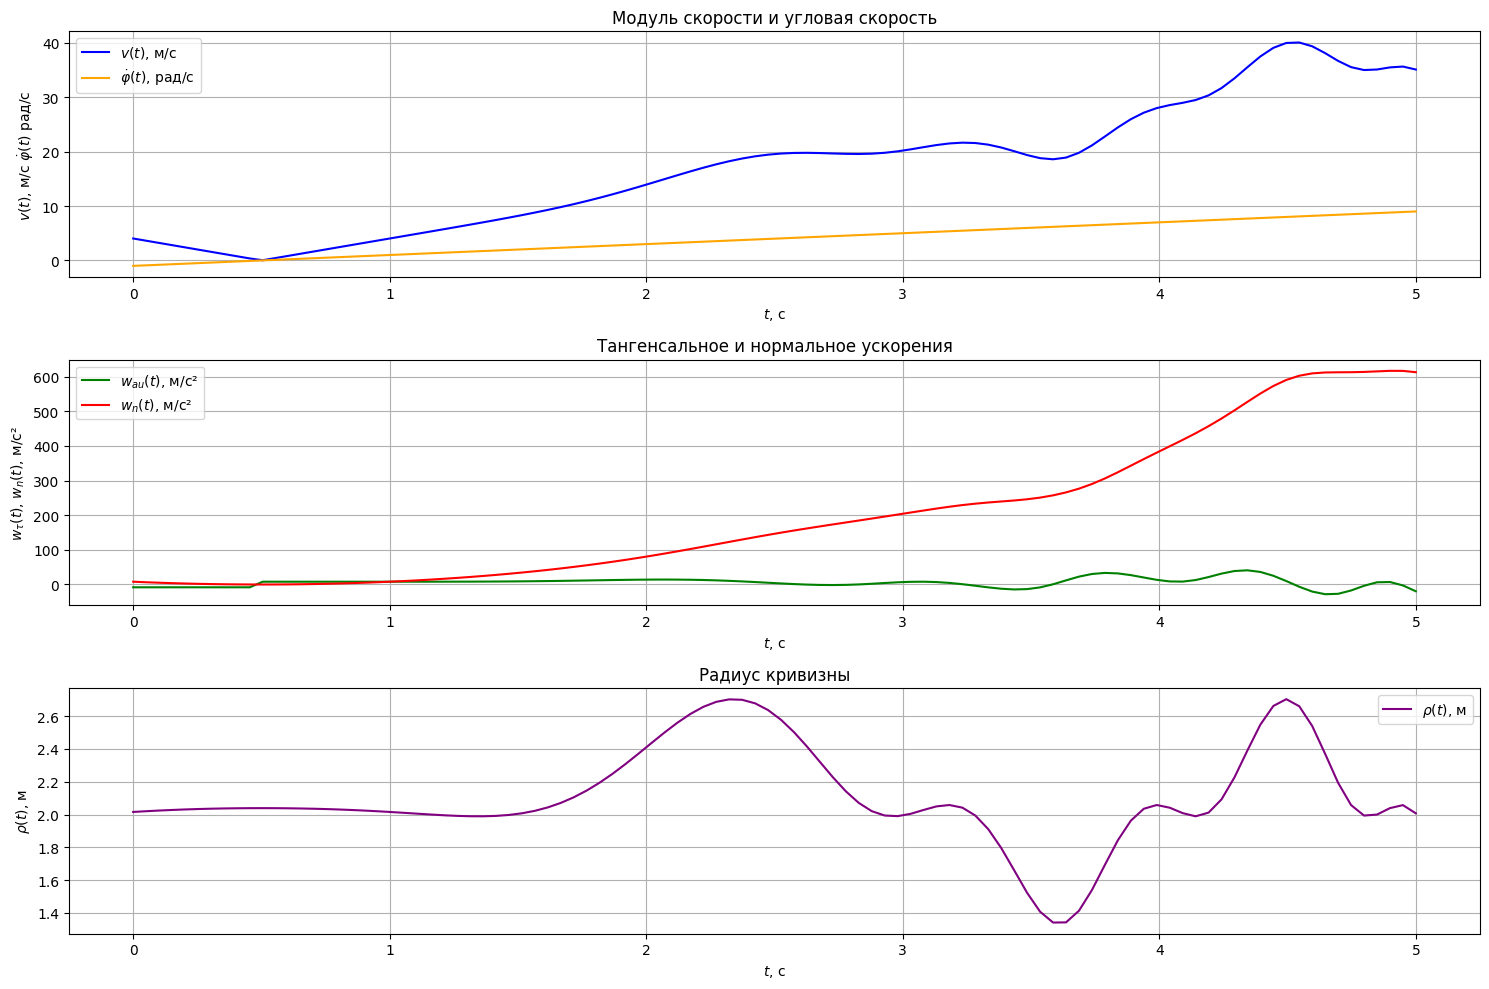

In [28]:
%matplotlib inline
import sympy as sp
import matplotlib.pyplot as plt
import numpy as np

R, k, omega, t_0 = 1, 1, 1, 1

t = sp.symbols('t')
phi = k*t**2 - omega*t
r = R*(sp.sin(phi/2) - 4*sp.cos(phi))

x = r * sp.cos(phi)
y = r * sp.sin(phi)

v_x = sp.diff(x, t)
v_y = sp.diff(y, t)
v = sp.sqrt(v_x**2 + v_y**2)

dphi = sp.diff(phi, t)

w_tau = sp.diff(v, t)

a_x = sp.diff(v_x, t)
a_y = sp.diff(v_y, t)

w = sp.sqrt(a_x**2 + a_y**2)
w_n = sp.sqrt(w**2 - w_tau**2)

rho = v**2 / w_n
rho_t0 = rho.subs(t, t_0)

# Подготовка для численного вычисления
t_vals = np.linspace(0, 5, 100)
v_func = sp.lambdify(t, v, 'numpy')
dphi_func = sp.lambdify(t, dphi, 'numpy')
w_tau_func = sp.lambdify(t, w_tau, 'numpy')
w_n_func = sp.lambdify(t, w_n, 'numpy')
rho_func = sp.lambdify(t, rho, 'numpy')

# Вычисление значений
v_vals = v_func(t_vals)
dphi_vals = dphi_func(t_vals)
w_tau_vals = w_tau_func(t_vals)
w_n_vals = w_n_func(t_vals)
rho_vals = rho_func(t_vals)

# Создание графиков
plt.figure(figsize=(15, 10))

# График v и dphi
plt.subplot(3, 1, 1)
plt.plot(t_vals, v_vals, label='$v(t)$, м/c', color='blue')
plt.plot(t_vals, dphi_vals, label=r'$\dot{\varphi}(t)$, рад/c', color='orange')
plt.title('Модуль скорости и угловая скорость')
plt.xlabel('$t$, с')
plt.ylabel(r'$v(t)$, м/с $\dot{\varphi}(t)$ рад/с')
plt.legend()
plt.grid()

# График w_tau и w_n
plt.subplot(3, 1, 2)
plt.plot(t_vals, w_tau_vals, label='$w_{\tau}(t)$, м/с²', color='green')
plt.plot(t_vals, w_n_vals, label='$w_n(t)$, м/с²', color='red')
plt.title('Тангенсальное и нормальное ускорения')
plt.xlabel('$t$, с')
plt.ylabel(r'$w_\tau(t)$, $w_n(t)$, м/с²')
plt.legend()
plt.grid()

# График rho
plt.subplot(3, 1, 3)
plt.plot(t_vals, rho_vals, label=r'$\rho(t)$, м', color='purple')
plt.title('Радиус кривизны')
plt.xlabel('$t$, с')
plt.ylabel(r'$\rho(t)$, м')
plt.legend()
plt.grid()

plt.tight_layout()
plt.show()


# 1. Скорости
$$
v(t) = \sqrt{\left(- \left(2 t - 1\right) \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} + \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)}\right)^{2} + \left(\left(2 t - 1\right) \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} + \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)}\right)^{2}}
$$
$$
\dot{\varphi}(t) = 2 t - 1
$$

# 2. Ускорения
$$
w_\tau(t) = \frac{\frac{\left(- \left(2 t - 1\right) \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} + \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)}\right) \left(- 2 \left(2 t - 1\right)^{2} \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} - 4 \left(2 t - 1\right) \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} - 4 \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} + 2 \left(- \left(t - \frac{1}{2}\right)^{2} \sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right)^{2} \cos{\left(t^{2} - t \right)} + 8 \sin{\left(t^{2} - t \right)} + \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)}\right) \cos{\left(t^{2} - t \right)}\right)}{2} + \frac{\left(\left(2 t - 1\right) \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} + \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)}\right) \left(- 2 \left(2 t - 1\right)^{2} \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} + 4 \left(2 t - 1\right) \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} + 4 \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} + 2 \left(- \left(t - \frac{1}{2}\right)^{2} \sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right)^{2} \cos{\left(t^{2} - t \right)} + 8 \sin{\left(t^{2} - t \right)} + \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)}\right) \sin{\left(t^{2} - t \right)}\right)}{2}}{\sqrt{\left(- \left(2 t - 1\right) \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} + \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)}\right)^{2} + \left(\left(2 t - 1\right) \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} + \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)}\right)^{2}}}
$$
$$
w_n(t) = \sqrt{- \frac{\left(\frac{\left(- \left(2 t - 1\right) \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} + \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)}\right) \left(- 2 \left(2 t - 1\right)^{2} \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} - 4 \left(2 t - 1\right) \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} - 4 \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} + 2 \left(- \left(t - \frac{1}{2}\right)^{2} \sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right)^{2} \cos{\left(t^{2} - t \right)} + 8 \sin{\left(t^{2} - t \right)} + \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)}\right) \cos{\left(t^{2} - t \right)}\right)}{2} + \frac{\left(\left(2 t - 1\right) \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} + \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)}\right) \left(- 2 \left(2 t - 1\right)^{2} \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} + 4 \left(2 t - 1\right) \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} + 4 \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} + 2 \left(- \left(t - \frac{1}{2}\right)^{2} \sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right)^{2} \cos{\left(t^{2} - t \right)} + 8 \sin{\left(t^{2} - t \right)} + \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)}\right) \sin{\left(t^{2} - t \right)}\right)}{2}\right)^{2}}{\left(- \left(2 t - 1\right) \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} + \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)}\right)^{2} + \left(\left(2 t - 1\right) \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} + \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)}\right)^{2}} + \left(- \left(2 t - 1\right)^{2} \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} + 2 \left(2 t - 1\right) \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} + 2 \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} + \left(- \left(t - \frac{1}{2}\right)^{2} \sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right)^{2} \cos{\left(t^{2} - t \right)} + 8 \sin{\left(t^{2} - t \right)} + \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)}\right) \sin{\left(t^{2} - t \right)}\right)^{2} + \left(- \left(2 t - 1\right)^{2} \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} - 2 \left(2 t - 1\right) \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} - 2 \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} + \left(- \left(t - \frac{1}{2}\right)^{2} \sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right)^{2} \cos{\left(t^{2} - t \right)} + 8 \sin{\left(t^{2} - t \right)} + \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)}\right) \cos{\left(t^{2} - t \right)}\right)^{2}}
$$

# 3. Радиус кривизны
$$
\rho(t) = \frac{\left(- \left(2 t - 1\right) \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} + \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)}\right)^{2} + \left(\left(2 t - 1\right) \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} + \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)}\right)^{2}}{\sqrt{- \frac{\left(\frac{\left(- \left(2 t - 1\right) \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} + \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)}\right) \left(- 2 \left(2 t - 1\right)^{2} \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} - 4 \left(2 t - 1\right) \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} - 4 \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} + 2 \left(- \left(t - \frac{1}{2}\right)^{2} \sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right)^{2} \cos{\left(t^{2} - t \right)} + 8 \sin{\left(t^{2} - t \right)} + \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)}\right) \cos{\left(t^{2} - t \right)}\right)}{2} + \frac{\left(\left(2 t - 1\right) \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} + \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)}\right) \left(- 2 \left(2 t - 1\right)^{2} \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} + 4 \left(2 t - 1\right) \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} + 4 \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} + 2 \left(- \left(t - \frac{1}{2}\right)^{2} \sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right)^{2} \cos{\left(t^{2} - t \right)} + 8 \sin{\left(t^{2} - t \right)} + \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)}\right) \sin{\left(t^{2} - t \right)}\right)}{2}\right)^{2}}{\left(- \left(2 t - 1\right) \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} + \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)}\right)^{2} + \left(\left(2 t - 1\right) \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} + \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)}\right)^{2}} + \left(- \left(2 t - 1\right)^{2} \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} + 2 \left(2 t - 1\right) \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} + 2 \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} + \left(- \left(t - \frac{1}{2}\right)^{2} \sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right)^{2} \cos{\left(t^{2} - t \right)} + 8 \sin{\left(t^{2} - t \right)} + \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)}\right) \sin{\left(t^{2} - t \right)}\right)^{2} + \left(- \left(2 t - 1\right)^{2} \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \cos{\left(t^{2} - t \right)} - 2 \left(2 t - 1\right) \left(\left(t - \frac{1}{2}\right) \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right) \sin{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} - 2 \left(\sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} - 4 \cos{\left(t^{2} - t \right)}\right) \sin{\left(t^{2} - t \right)} + \left(- \left(t - \frac{1}{2}\right)^{2} \sin{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)} + 4 \left(2 t - 1\right)^{2} \cos{\left(t^{2} - t \right)} + 8 \sin{\left(t^{2} - t \right)} + \cos{\left(\frac{t^{2}}{2} - \frac{t}{2} \right)}\right) \cos{\left(t^{2} - t \right)}\right)^{2}}}
$$
$$
\rho(t_0) = \frac{\sqrt{65}}{4}
$$